<a href="https://colab.research.google.com/github/UmaNagirireddi/ML_Assignment2/blob/main/ML_AST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [7]:
df = pd.read_csv('/content/Housing.csv')

df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [8]:
inputData = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
outputData = ['price']

In [9]:
np.random.seed(0)
df_train, df_test = train_test_split(df[inputData + outputData], train_size=0.8, test_size=0.2, random_state= 100)

In [10]:
xTrain = df_train[inputData].to_numpy()
yTrain = df_train[outputData].to_numpy()
xVal = df_test[inputData].to_numpy()
yVal = df_test[outputData].to_numpy()

In [11]:
def linearRegression(X_train, y_train, X_val, y_val, epochs, alpha, lambdaa = 0):
  trainLoss = []
  validationLoss = []

  m, n = X_train.shape
  np.random.seed(0)
  theta = np.random.randn(n+1,1)
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]
  y_train = y_train.reshape(m,1)
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

  for iteration in range(epochs):
      gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambdaa * np.concatenate((np.zeros((1,1)), theta[1:])))
      theta -= alpha * gradients

      train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) + np.sum(np.square(theta[1:])))
      val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

      trainLoss.append(train_loss)
      validationLoss.append(val_loss)
  return theta, trainLoss, validationLoss

In [12]:
thetaAlpha_1, trainLossAlpha_1, valLossAlpha_1  = linearRegression(xTrain, yTrain, xVal, yVal, 25, alpha = 0.01)

thetaAlpha_2, trainLossAlpha_2, valLossAlpha_2  = linearRegression(xTrain, yTrain, xVal, yVal, 25, alpha = 0.1)

<ipython-input-11-151800999a3f>:18: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) + np.sum(np.square(theta[1:])))
<ipython-input-11-151800999a3f>:19: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))


In [13]:
thetaAlpha_2

array([[9.90020847e+168],
       [5.98226828e+172],
       [2.95202840e+169],
       [1.31733507e+169],
       [1.82423934e+169],
       [8.44965659e+168]])

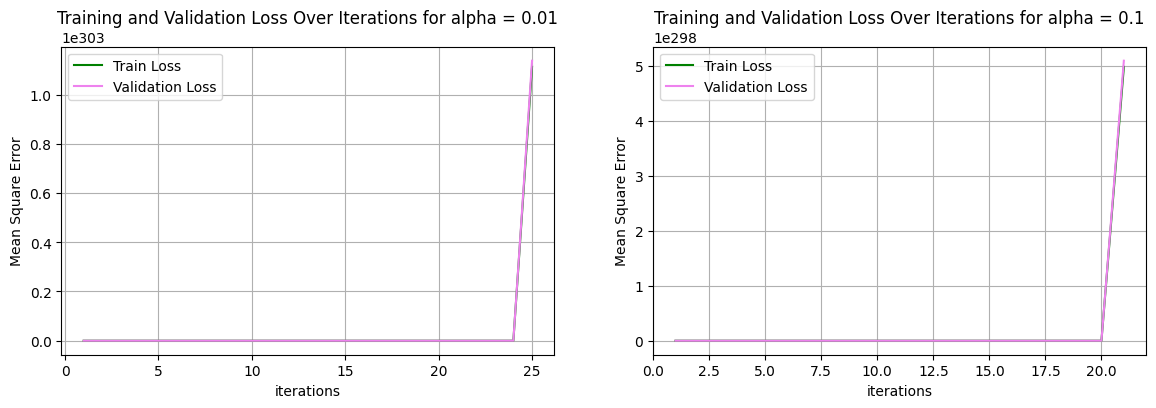

End of question 1


In [14]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossAlpha_1) + 1), trainLossAlpha_1, color='Green', label = 'Train Loss')
plt.plot(range(1, len(valLossAlpha_1) + 1), valLossAlpha_1, color='Violet', label = 'Validation Loss')
plt.xlabel("iterations")
plt.ylabel("Mean Square Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossAlpha_2) + 1), trainLossAlpha_2, color='Green', label = 'Train Loss')
plt.plot(range(1, len(valLossAlpha_2) + 1), valLossAlpha_2, color='Violet', label = 'Validation Loss')
plt.xlabel("iterations")
plt.ylabel("Mean Square Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

print ("End of question 1")

In [15]:
inputData2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
outputData2 = ['price']

In [26]:
binaryColumns = df.select_dtypes(include=['object']).columns

In [27]:
df[binaryColumns] = df[binaryColumns].apply(lambda x: x.map({'yes': 1, 'no': 0}))


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  0 non-null      float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


In [19]:
np.random.seed(0)
dfTrain_2, dfTest_2 = train_test_split(df[inputData2 + outputData2], train_size = 0.8, test_size = 0.2, random_state= 100)


In [20]:
XTrain_2 = dfTrain_2[inputData2].to_numpy()
yTrain_2 = dfTrain_2['price'].to_numpy()
XVal_2 = dfTest_2[inputData2].to_numpy()
yVal_2 = dfTest_2['price'].to_numpy()


In [28]:
thetaAlpha_3, trainLossAlpha_3, valLossAlpha_3  = linearRegression(XTrain_2, yTrain_2, XVal_2, yVal_2,25, alpha = 0.00000001)
thetaAlpha_4, trainLossAlpha_4, valLossAlpha_4  = linearRegression(XTrain_2, yTrain_2, XVal_2, yVal_2,25, alpha = 0.00001)


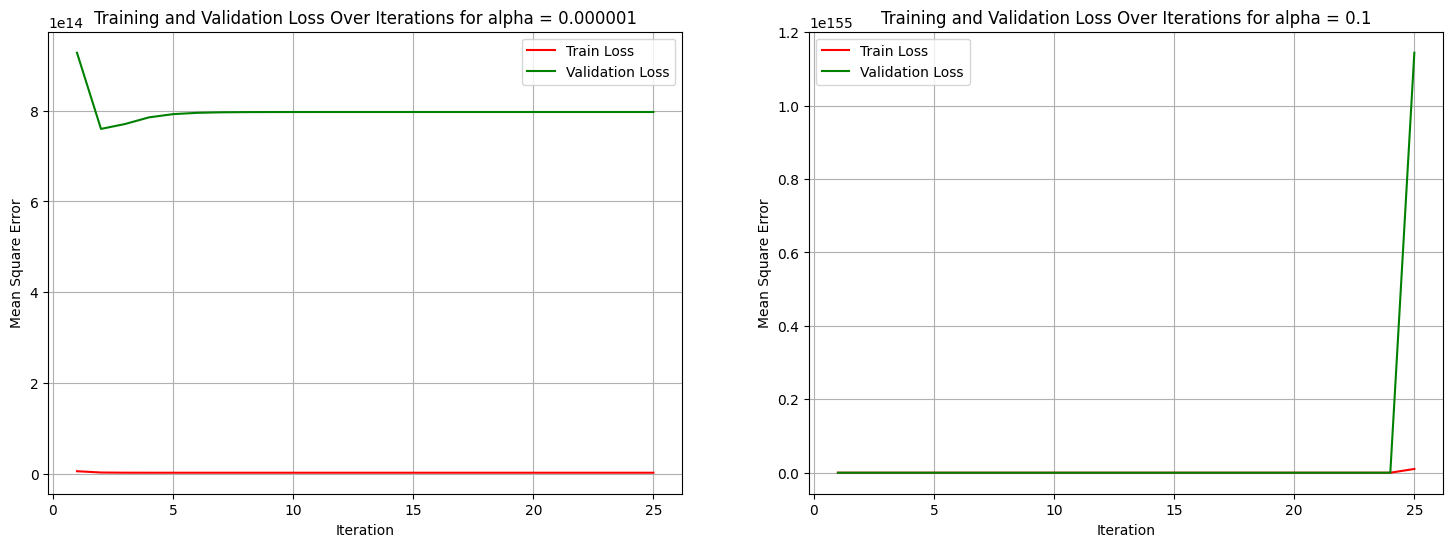

In [29]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossAlpha_3) + 1), trainLossAlpha_3, color='red', label = 'Train Loss')
plt.plot(range(1, len(valLossAlpha_3) + 1), valLossAlpha_3, color='Green', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Square Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.000001")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossAlpha_4) + 1), trainLossAlpha_4, color='red', label = 'Train Loss')
plt.plot(range(1, len(valLossAlpha_4) + 1), valLossAlpha_4, color='Green', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Square Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

In [31]:
thetaAlpha_4

array([[9.50980640e+68],
       [5.74636516e+72],
       [2.83561893e+69],
       [1.26538765e+69],
       [1.75230279e+69],
       [8.62111905e+68],
       [1.87090988e+68],
       [3.50695726e+68],
       [5.27902453e+67],
       [3.23226420e+68],
       [8.11645517e+68],
       [2.56809609e+68]])

In [90]:
normalizedInput = MinMaxScaler()
standardizedInput = StandardScaler()
normalizedOutput = MinMaxScaler()
standardizedOutput = StandardScaler()

xTrainNormalize = normalizedInput.fit_transform(df_train[inputData])
yTrainNormalize = normalizedOutput.fit_transform(df_train[outputData])

xTestNormalize = normalizedInput.transform(df_test[inputData])
yTestNormalize = normalizedOutput.transform(df_test[outputData])

xTrainStandard = normalizedInput.fit_transform(df_train[inputData])
yTrainStandard = standardizedOutput.fit_transform(df_train[outputData])

xTestStandard = normalizedInput.transform(df_test[inputData])
yTestStandard = standardizedOutput.transform(df_test[outputData])

In [91]:
thetaAlphaNormalInput, trainLossAlphaNormalInput, valLossAlphaNormalInput = linearRegression(xTrainNormalize,
                                                                                       yTrain,
                                                                                       xTestNormalize,
                                                                                       yVal ,1000, alpha = 0.01)
thetaAlphaNormalInput_1, trainLossAlphaNormalInput_1, valLossAlphaNormalInput_1 = linearRegression(xTrainNormalize,
                                                                                       yTrain,
                                                                                       xTestNormalize,
                                                                                       yVal, 1000, alpha = 0.1)

thetaAlphaNormal, trainLossAlphaNormal, valLossAlphaNormal = linearRegression(xTrainNormalize,
                                                                                       yTrainNormalize,
                                                                                       xTestNormalize,
                                                                                       yTestNormalize ,1000, alpha = 0.01)
thetaAlphaNormal_1, trainLossAlphaNormal_1, valLossAlphaNormal_1 = linearRegression(xTrainNormalize,
                                                                                       yTrainNormalize,
                                                                                       xTestNormalize,
                                                                                       yTestNormalize, 1000, alpha = 0.1)


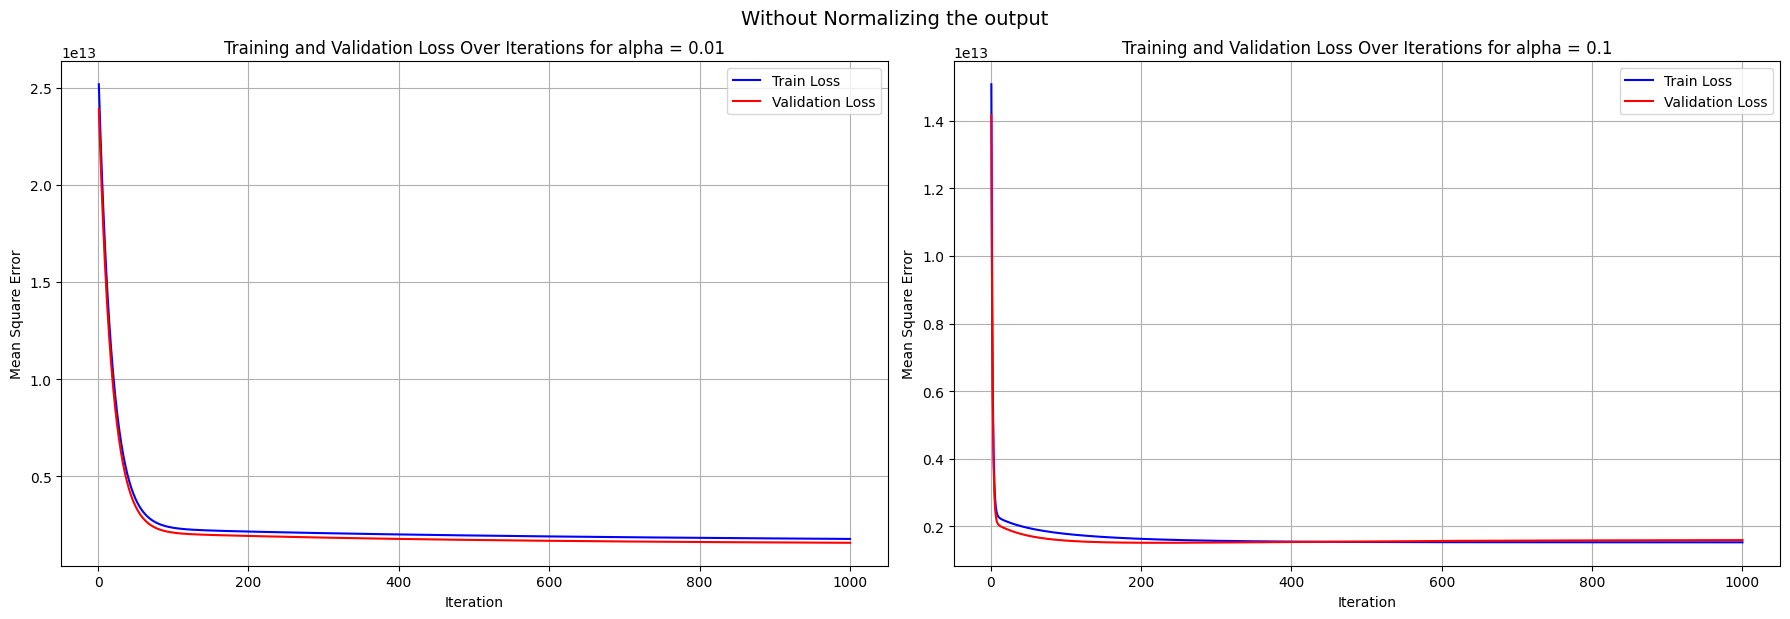

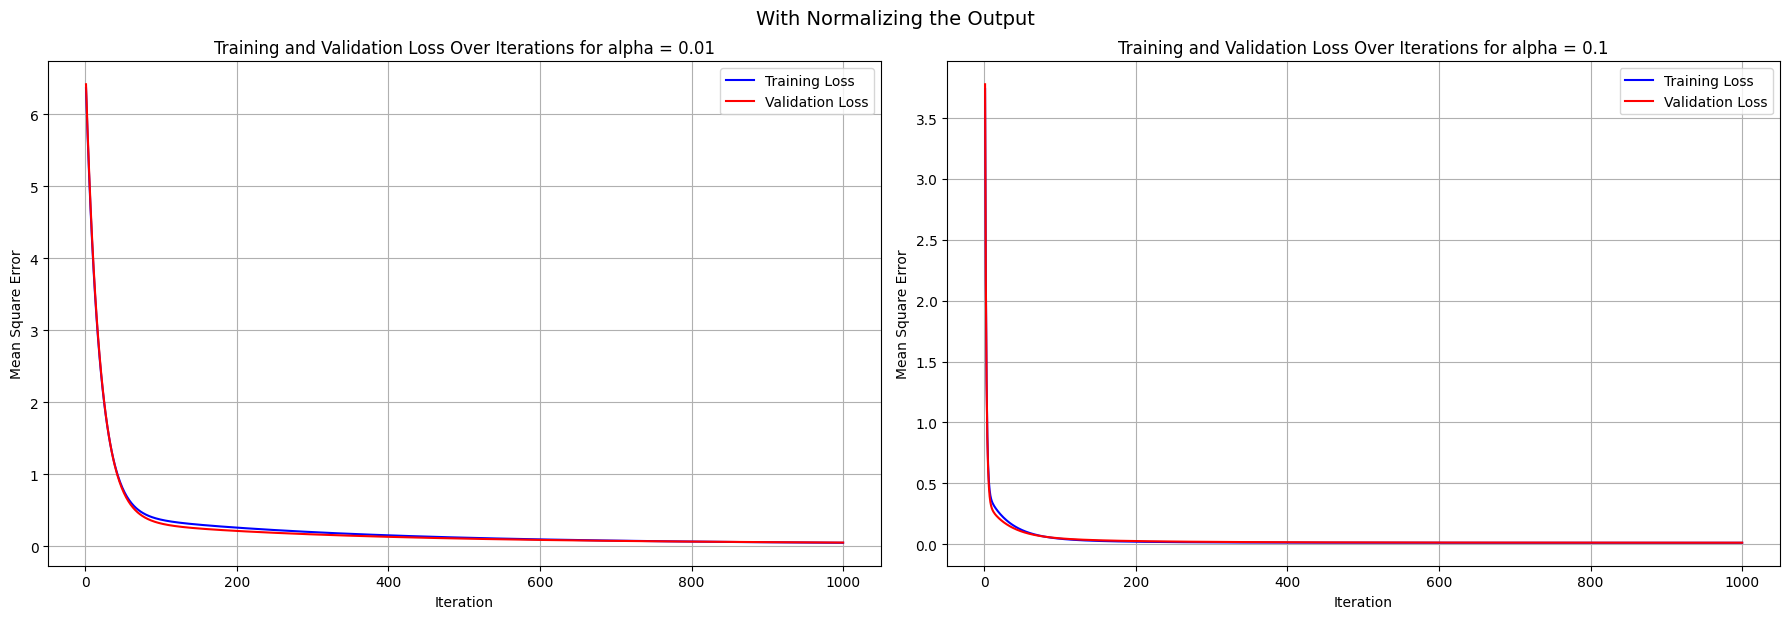

In [99]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossAlphaNormalInput) + 1), trainLossAlphaNormalInput, color='blue', label = 'Train Loss')
plt.plot(range(1, len(valLossAlphaNormalInput) + 1), valLossAlphaNormalInput, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Square Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Normalizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossAlphaNormalInput_1) + 1), trainLossAlphaNormalInput_1, color='blue', label = 'Train Loss')
plt.plot(range(1, len(valLossAlphaNormalInput_1) + 1), valLossAlphaNormalInput_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Square Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

plt.tight_layout()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossAlphaNormal) + 1), trainLossAlphaNormal, color='blue', label = 'Training Loss')
plt.plot(range(1, len(valLossAlphaNormal) + 1), valLossAlphaNormal, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Square Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossAlphaNormal_1) + 1), trainLossAlphaNormal_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(valLossAlphaNormal_1) + 1), valLossAlphaNormal_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Square Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Normalizing the Output', ha='center', fontsize=14)

plt.tight_layout()

plt.show()

In [93]:
thetaAlphaStandardInput, trainLossAlphaStandardInput, valLossAlphaStandardInput = linearRegression(xTrainStandard,
                                                                                                               yTrain,
                                                                                                               xTestStandard,
                                                                                                               yVal,2000, alpha = 0.01)
thetaAlphaStandardInput_1, trainLossAlphaStandardInput_1, valLossAlphaStandardInput_1 = linearRegression(xTrainStandard,
                                                                                                                     yTrain,
                                                                                                                     xTestStandard,
                                                                                                                     yVal,2000, alpha = 0.1)

thetaAlphaStandard, trainLossAlphaStandard, valLossAlphaStandard = linearRegression(xTrainStandard,
                                                                                       yTrainStandard,
                                                                                       xTestStandard,
                                                                                       yTestStandard ,2000, alpha = 0.01)
thetaAlphaStandard_1, trainLossAlphaStandard_1, valLossAlphaStandard_1 = linearRegression(xTrainStandard,
                                                                                       yTrainStandard,
                                                                                       xTestStandard,
                                                                                       yTestStandard ,2000, alpha = 0.1)


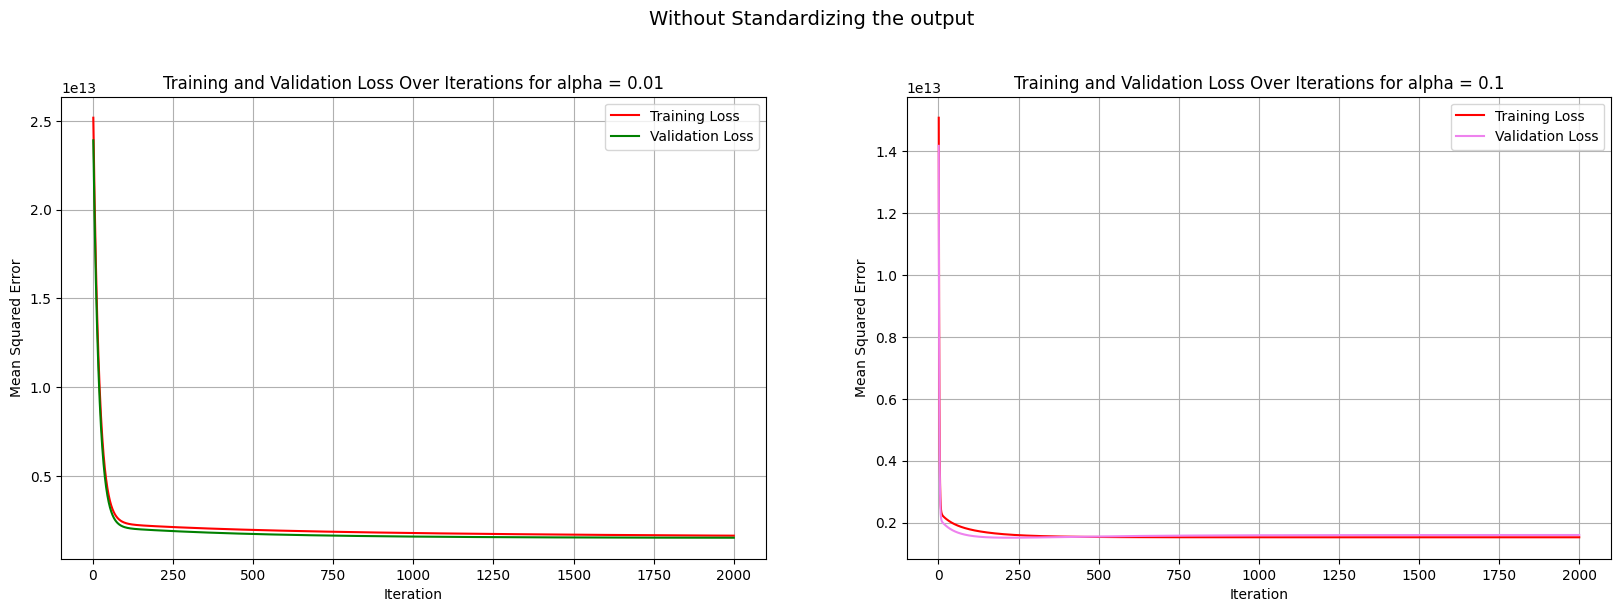

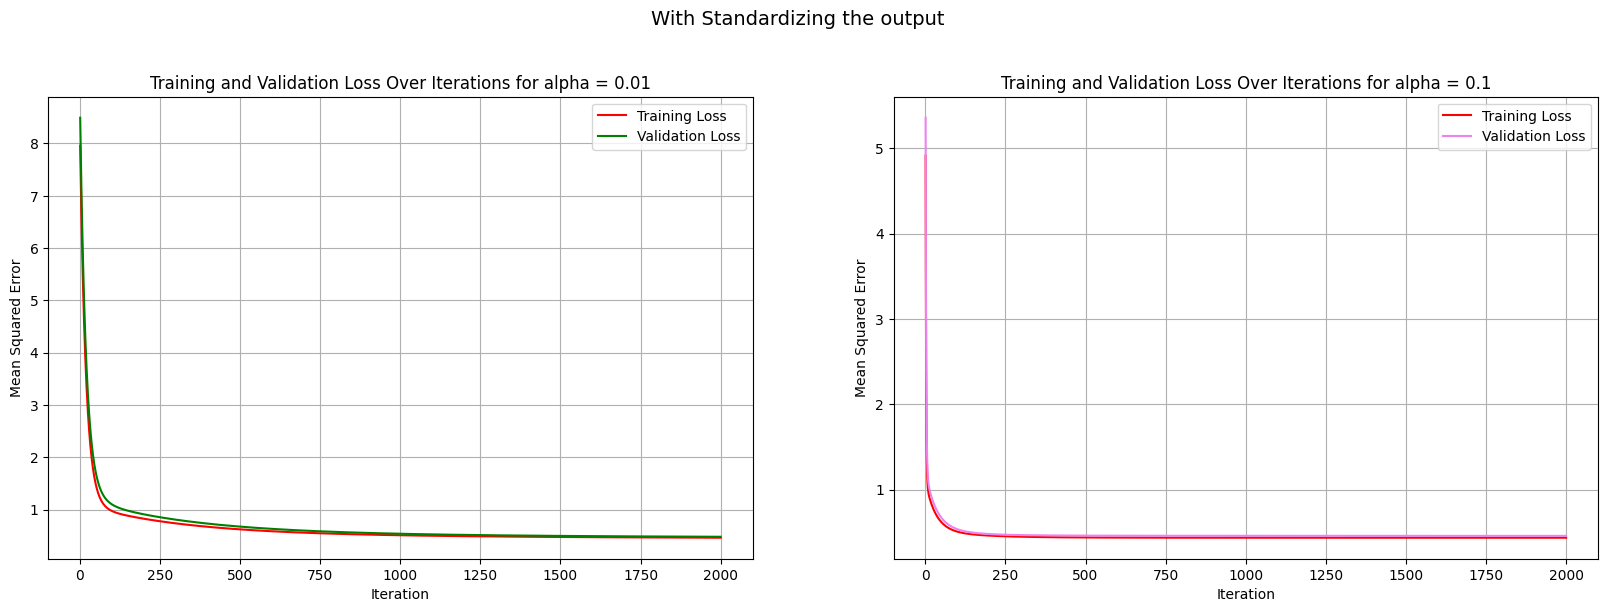

In [96]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossAlphaStandardInput) + 1), trainLossAlphaStandardInput, color='red', label = 'Training Loss')
plt.plot(range(1, len(valLossAlphaStandardInput) + 1), valLossAlphaStandardInput, color='Green', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()


middle_x = 0.5
middle_y = 1
plt.figtext(middle_x, middle_y, 'Without Standardizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossAlphaStandardInput_1) + 1), trainLossAlphaStandardInput_1, color='red', label = 'Training Loss')
plt.plot(range(1, len(valLossAlphaStandardInput_1) + 1), valLossAlphaStandardInput_1, color='violet', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossAlphaStandard) + 1), trainLossAlphaStandard, color='red', label = 'Training Loss')
plt.plot(range(1, len(valLossAlphaStandard) + 1), valLossAlphaStandard, color='Green', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Standardizing the output', ha='center', fontsize=14)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossAlphaStandard_1) + 1), trainLossAlphaStandard_1, color='red', label = 'Training Loss')
plt.plot(range(1, len(valLossAlphaStandard_1) + 1), valLossAlphaStandard_1, color='violet', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

In [97]:
trainLossAlphaNormal[-1], trainLossAlphaNormal_1[-1], trainLossAlphaStandard[-1], trainLossAlphaStandard_1[-1]


(0.04520318017409938,
 0.011443120035882751,
 0.4621814483034279,
 0.4375550100601556)

In [119]:
normalizerInput_2 = MinMaxScaler()
normalizerOutput_2 = MinMaxScaler()
standardizerInput_2 = StandardScaler()
standardizerOutput_2 = StandardScaler()

xTrainNormalize_2 = normalizerInput_2.fit_transform(dfTrain_2[inputData2])
yTrainNormalize_2 = normalizerOutput_2.fit_transform(dfTrain_2[outputData2])

xTestNormalize_2 = normalizerInput_2.transform(dfTest_2[inputData2])
yTestNormalize_2 = normalizerOutput_2.transform(dfTest_2[outputData2])

xTrainStandard_2 = standardizerInput_2.fit_transform(dfTrain_2[inputData2])
yTrainStandard_2 = standardizerOutput_2.fit_transform(dfTrain_2[outputData2])

xTestStandard_2 = standardizerInput_2.transform(dfTest_2[inputData2])
yTestStandard_2 = standardizerOutput_2.transform(dfTest_2[outputData2])

In [104]:
thetaAlphaNormalInput_2, trainLossAlphaNormalInput_2, valLossAlphaNormalInput_2 = linearRegression(XTrainNormalize_2,
                                                                                                              yTrain_2,
                                                                                                              xTestNormalize_2,
                                                                                                              yVal_2 ,1000, alpha = 0.01)
thetaAlphaNormalInput_1_2, trainLossAlphaNormalInput_1_2, valLossAlphaNormalInput_1_2 = linearRegression(XTrainNormalize_2,
                                                                                                                     yTrain_2,
                                                                                                                     xTestNormalize_2,
                                                                                                                     yVal_2, 1000, alpha = 0.1)

thetaAlphaNormalInput_1_2, trainLossAlphaNormal_2, valLossAlphaNormal_2 = linearRegression(XTrainNormalize_2,
                                                                                            yTrainNormalize_2,
                                                                                            xTestNormalize_2,
                                                                                            yTestNormalize_2 ,1000, alpha = 0.01)
thetaAlphaNormal_1_2, trainLossAlphaNormal_1_2, valLossAlphaNormal_1_2 = linearRegression(XTrainNormalize_2,
                                                                                                   yTrainNormalize_2,
                                                                                                   xTestNormalize_2,
                                                                                                   yTestNormalize_2, 1000, alpha = 0.1)

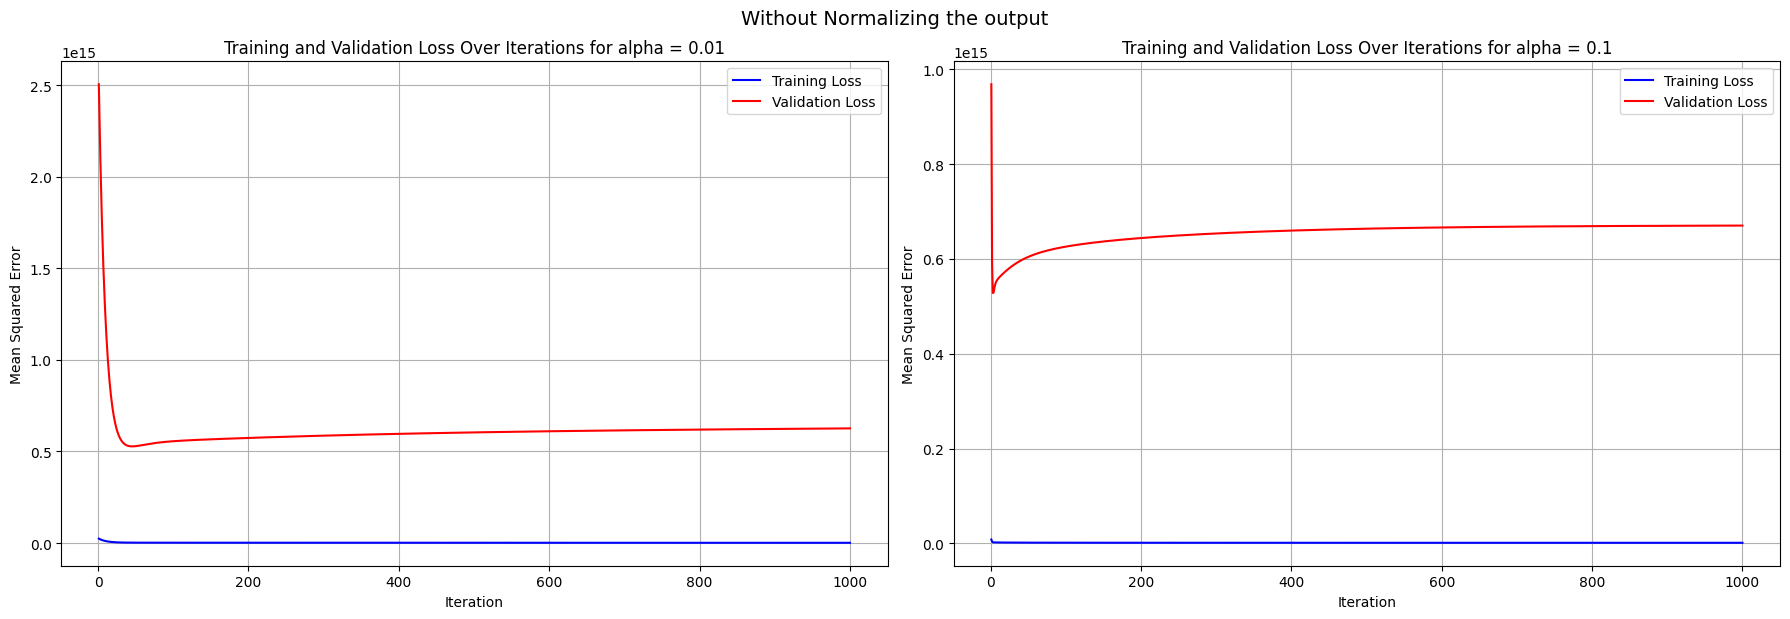

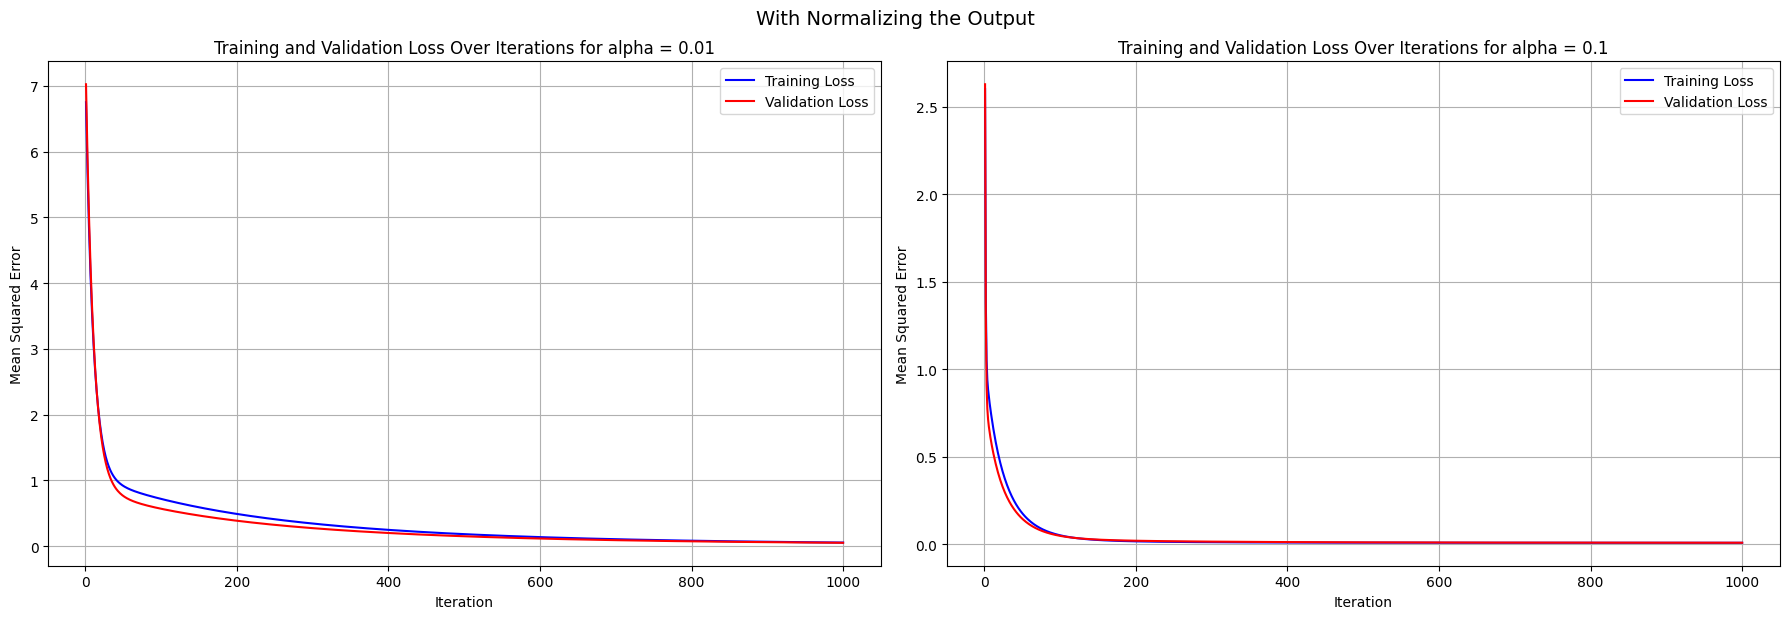

In [105]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossAlphaNormalInput_2) + 1), trainLossAlphaNormalInput_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(valLossAlphaNormalInput_2) + 1), valLossAlphaNormalInput_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middleX = 0.5
middleY = 1
plt.figtext(middleX, middleY, 'Without Normalizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossAlphaNormalInput_1_2) + 1), trainLossAlphaNormalInput_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(valLossAlphaNormalInput_1_2) + 1), valLossAlphaNormalInput_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

plt.tight_layout()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossAlphaNormal_2) + 1), trainLossAlphaNormal_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(valLossAlphaNormal_2) + 1), valLossAlphaNormal_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossAlphaNormal_1_2) + 1), trainLossAlphaNormal_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(valLossAlphaNormal_1_2) + 1), valLossAlphaNormal_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

middleX = 0.5
middleY = 1
plt.figtext(middleX, middleY, 'With Normalizing the Output', ha='center', fontsize=14)

plt.tight_layout()

In [106]:
thetaAlphaStandardInput_2, trainLossAlphaStandardInput_2, valLossAlphaStandardInput_2 = linearRegression(xTrainStandard_2,
                                                                                                               yTrain_2,
                                                                                                               xTestStandard_2,
                                                                                                               yVal_2,1000, alpha = 0.01)
thetaAlphaStandardInput_2, trainLossAlphaStandardInput_1_2, valLossAlphaStandardInput_1_2 = linearRegression(xTrainStandard_2,
                                                                                                                     yTrain_2,
                                                                                                                     xTestStandard_2,
                                                                                                                     yVal_2, 1000, alpha = 0.1)

thetaAlphaStandard_2, trainLossAlphaStandard_2, valLossAlphaStandard_2 = linearRegression(xTrainStandard_2,
                                                                                             yTrainStandard_2,
                                                                                             xTestStandard_2,
                                                                                             yTestStandard_2, 500, alpha = 0.01)
theta_alpha_standard_1_2, trainLossAlphaStandard_1_2, valLossAlphaStandard_1_2 = linearRegression(xTrainStandard_2,
                                                                                                   yTrainStandard_2,
                                                                                                   xTestStandard_2,
                                                                                                   yTestStandard_2, 500, alpha = 0.1)

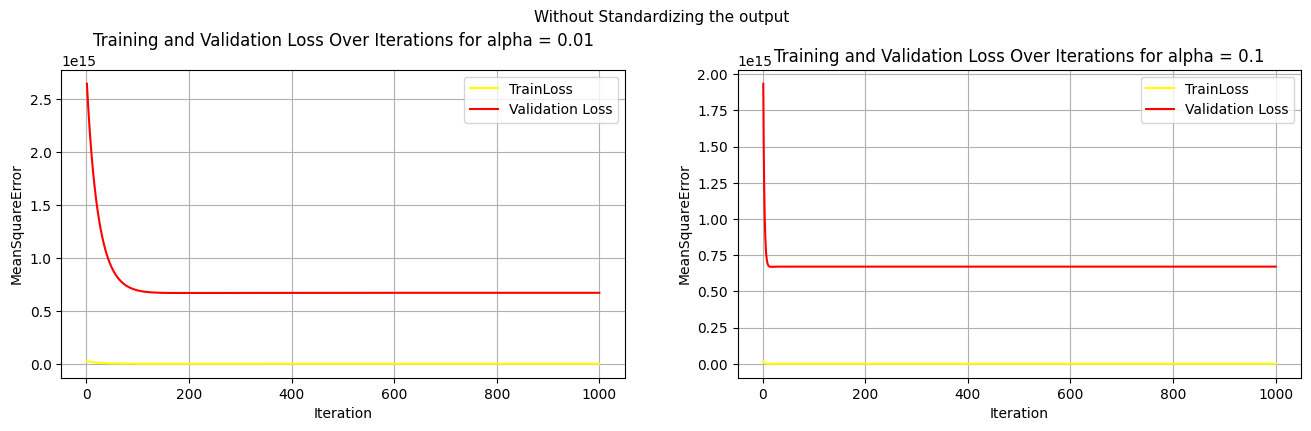

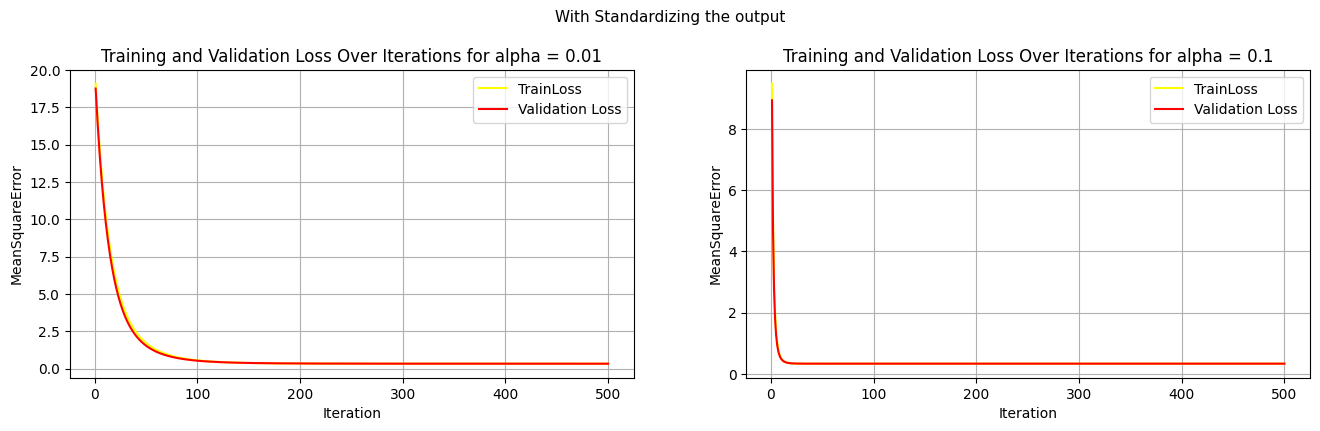

In [107]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossAlphaStandardInput_2) + 1), trainLossAlphaStandardInput_2, color='Yellow', label = 'TrainLoss')
plt.plot(range(1, len(valLossAlphaStandardInput_2) + 1), valLossAlphaStandardInput_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquareError")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()


middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Standardizing the output', ha='center', fontsize=11)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossAlphaStandardInput_1_2) + 1), trainLossAlphaStandardInput_1_2, color='Yellow', label = 'TrainLoss')
plt.plot(range(1, len(valLossAlphaStandardInput_1_2) + 1), valLossAlphaStandardInput_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquareError")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossAlphaStandard_2) + 1), trainLossAlphaStandard_2, color='Yellow', label = 'TrainLoss')
plt.plot(range(1, len(valLossAlphaStandard_2) + 1), valLossAlphaStandard_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquareError")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Standardizing the output', ha='center', fontsize=11)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossAlphaStandard_1_2) + 1), trainLossAlphaStandard_1_2, color='Yellow', label = 'TrainLoss')
plt.plot(range(1, len(valLossAlphaStandard_1_2) + 1), valLossAlphaStandard_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquareError")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

In [111]:
print('Train loss values are: ')
trainLossAlphaNormal_2[-1], trainLossAlphaNormal_1_2[-1], trainLossAlphaStandard_2[-1], trainLossAlphaStandard_1_2[-1]

Train loss values are: 


(0.05216810804441208,
 0.008656682004726905,
 0.33016906726383827,
 0.33015434509881275)

In [110]:
print('Validation loss values are:')
valLossAlphaNormal_2[-1], valLossAlphaNormal_1_2[-1], valLossAlphaStandard_2[-1], valLossAlphaStandard_1_2[-1]

Validation loss values are:


(0.048760372913051464,
 0.008994025302430956,
 0.3320770615669881,
 0.3322934350296885)

In [114]:
thetaLambda_0, trainLossLambda_0, valLossLambda_0 = linearRegression(xTrainNormalize,
                                                                         yTrainNormalize,
                                                                         xTestNormalize,
                                                                         yTestNormalize, 2000, alpha = 0.1, lambdaa = 0)


thetaLambda_1, trainLossLambda_1, valLossLambda_1 = linearRegression(xTrainNormalize,
                                                                         yTrainNormalize,
                                                                         xTestNormalize,
                                                                         yTestNormalize, 2000, alpha = 0.1, lambdaa = 1)

theta_lambda_5, trainLossLambda_5, valLossLambda_5 = linearRegression(xTrainNormalize,
                                                                         yTrainNormalize,
                                                                         xTestNormalize,
                                                                         yTestNormalize, 2000, alpha = 0.1, lambdaa = 5)
thetaLambda_10, trainLossLambda_10, valLossLambda_10 = linearRegression(xTrainNormalize,
                                                                            yTrainNormalize,
                                                                            xTestNormalize,
                                                                            yTestNormalize, 2000, alpha = 0.1, lambdaa = 10)

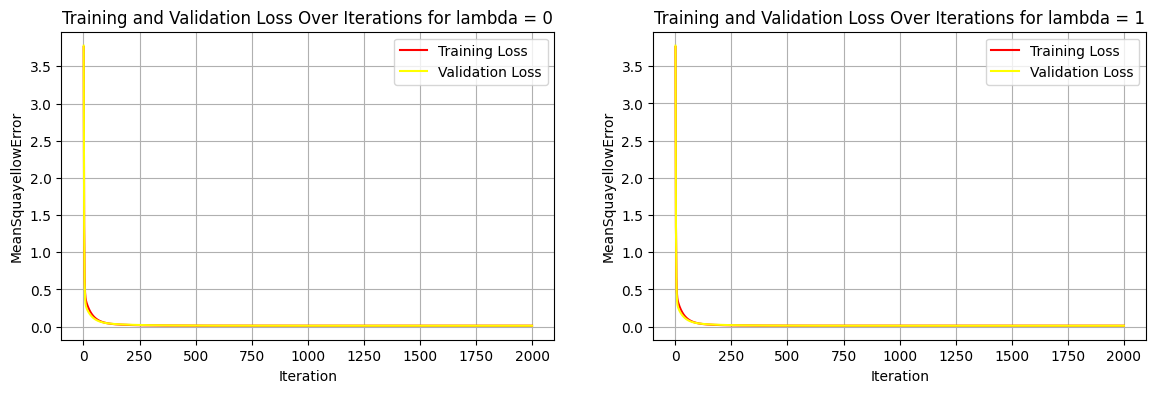

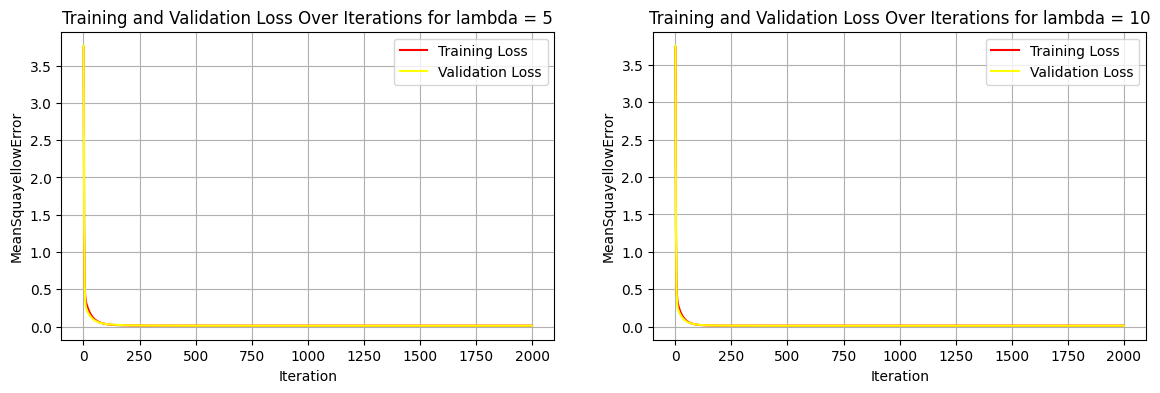

Training loss lambda values:
Validation loss lambda values:


(0.011984965057254774,
 0.01175084787497417,
 0.011705140803512596,
 0.01227028732948862)

In [115]:

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossLambda_0) + 1), trainLossLambda_0, color='red', label = 'Training Loss')
plt.plot(range(1, len(valLossLambda_0) + 1), valLossLambda_0, color='yellow', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquayellowError")
plt.title("Training and Validation Loss Over Iterations for lambda = 0")
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossLambda_1) + 1), trainLossLambda_1, color='red', label = 'Training Loss')
plt.plot(range(1, len(valLossLambda_1) + 1), valLossLambda_1, color='yellow', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquayellowError")
plt.title("Training and Validation Loss Over Iterations for lambda = 1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossLambda_5) + 1), trainLossLambda_5, color='red', label = 'Training Loss')
plt.plot(range(1, len(valLossLambda_5) + 1), valLossLambda_5, color='yellow', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquayellowError")
plt.title("Training and Validation Loss Over Iterations for lambda = 5")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossLambda_10) + 1), trainLossLambda_10, color='red', label = 'Training Loss')
plt.plot(range(1, len(valLossLambda_10) + 1), valLossLambda_10, color='yellow', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquayellowError")
plt.title("Training and Validation Loss Over Iterations for lambda = 10")
plt.legend()
plt.grid()
plt.show()


print('Training loss lambda values:')
trainLossLambda_0[-1], trainLossLambda_1[-1], trainLossLambda_5[-1], trainLossLambda_10[-1]

print('Validation loss lambda values:')
valLossLambda_0[-1], valLossLambda_1[-1], valLossLambda_5[-1], valLossLambda_10[-1]



In [116]:
print("validation loss")

trainLossLambda_0[-1], trainLossLambda_1[-1], trainLossLambda_5[-1], trainLossLambda_10[-1]

validation loss


(0.012137069078371822,
 0.012083091380549544,
 0.012472051715665409,
 0.013261403248902924)

In [117]:
print("validation loss")

valLossLambda_10[-1], valLossLambda_1[-1], valLossLambda_5[-1], valLossLambda_10[-1]

validation loss


(0.01227028732948862,
 0.01175084787497417,
 0.011705140803512596,
 0.01227028732948862)

In [124]:
thetaLambda_2_0, trainLossLambda_2_0, valLossLambda_2_0 = linearRegression(xTrainNormalize_2,
                                                                                yTrainNormalize_2,
                                                                                xTestNormalize_2,
                                                                                yTestNormalize_2, 2000, alpha = 0.1, lambdaa = 0)


thetaLambda_2_1, trainLossLambda_2_1, valLossLambda_2_1 = linearRegression(xTrainNormalize_2,
                                                                                yTrainNormalize_2,
                                                                                xTestNormalize_2,
                                                                                yTestNormalize_2, 2000, alpha = 0.1, lambdaa = 1)

thetaLambda_2_5, trainLossLambda_2_5, valLossLambda_2_5 = linearRegression(xTrainNormalize_2,
                                                                                yTrainNormalize_2,
                                                                                xTestNormalize_2,
                                                                                yTestNormalize_2, 2000, alpha = 0.1, lambdaa = 5)

thetaLambda_2_10, trainLossLambda_2_10, valLossLambda_2_10 = linearRegression(xTrainNormalize_2,
                                                                                    yTrainNormalize_2,
                                                                                    xTestNormalize_2,
                                                                                    yTestNormalize_2, 2000, alpha = 0.1, lambdaa = 10)



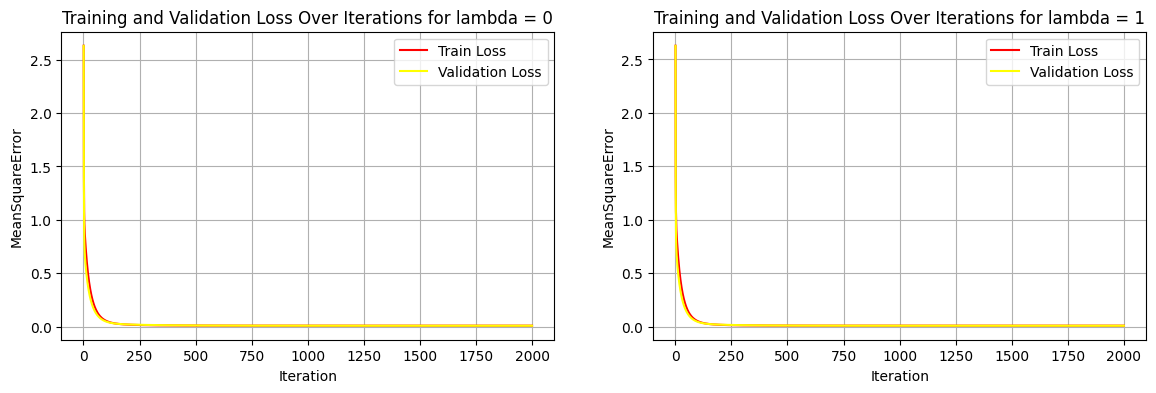

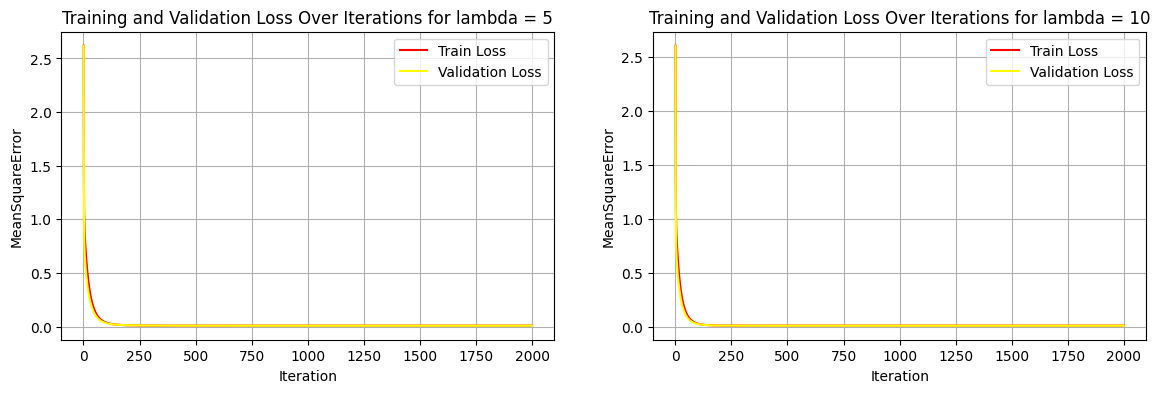

In [125]:

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossLambda_2_0) + 1), trainLossLambda_2_0, color='red', label = 'Train Loss')
plt.plot(range(1, len(valLossLambda_2_0) + 1), valLossLambda_2_0, color='yellow', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquareError")
plt.title("Training and Validation Loss Over Iterations for lambda = 0")
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossLambda_2_1) + 1), trainLossLambda_2_1, color='red', label = 'Train Loss')
plt.plot(range(1, len(valLossLambda_2_1) + 1), valLossLambda_2_1, color='yellow', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquareError")
plt.title("Training and Validation Loss Over Iterations for lambda = 1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(trainLossLambda_2_5) + 1), trainLossLambda_2_5, color='red', label = 'Train Loss')
plt.plot(range(1, len(valLossLambda_2_5) + 1), valLossLambda_2_5, color='yellow', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquareError")
plt.title("Training and Validation Loss Over Iterations for lambda = 5")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainLossLambda_2_10) + 1), trainLossLambda_2_10, color='red', label = 'Train Loss')
plt.plot(range(1, len(valLossLambda_2_10) + 1), valLossLambda_2_10, color='yellow', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("MeanSquareError")
plt.title("Training and Validation Loss Over Iterations for lambda = 10")
plt.legend()
plt.grid()
plt.show()


In [127]:
print("Train loss values:")
trainLossLambda_2_0[-1], trainLossLambda_2_1[-1], trainLossLambda_2_5[-1], trainLossLambda_2_10[-1]



Train loss values:
Validation loss values:


(0.008679991479177609,
 0.00852181501950358,
 0.008447320248163755,
 0.008727668295105248)

In [128]:
print("Validation loss values:")
valLossLambda_2_0[-1], valLossLambda_2_1[-1], valLossLambda_2_5[-1], valLossLambda_2_10[-1]

Validation loss values:


(0.008679991479177609,
 0.00852181501950358,
 0.008447320248163755,
 0.008727668295105248)